## Adidas Yeezy 350 V2 - Zebra

![alt text](https://static.highsnobiety.com/wp-content/uploads/2017/07/17151218/adidas-yeezy-350-v2-stockx-contest-0001-480x320.jpg "Image from HighSnobiety.com")

In this notebook, I'm going to take a high level look at Sales data that I've gathered for the Yeezy 350 V2. This data was collected from February 2017 to February 2018 from StockX.com, a marketplace where users can sell sneakers, streetwear and more. First we load the necessary libraries.

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Next we'll load the data

In [3]:
df = pd.read_csv("sneaker_sales\Adidas Yeezy Boost 350 V2 Zebra.csv")
df.head()

,Unnamed: 0,createdAt,amount,shoeSize
0,0,2018-02-19 15:18:16,539,9.0
1,1,2018-02-19 15:01:10,560,11.0
2,2,2018-02-19 15:00:23,492,4.0
3,3,2018-02-19 15:00:20,523,9.5
4,4,2018-02-19 15:00:17,511,9.0


Right now, the 'createdAt' column is a string, so we'll need to reformat this to a datetime so that we can use it for our plots.

In [4]:
df['createdAt'] = df['createdAt'].astype('datetime64[ns]')
df.head()

,Unnamed: 0,createdAt,amount,shoeSize
0,0,2018-02-19 15:18:16,539,9.0
1,1,2018-02-19 15:01:10,560,11.0
2,2,2018-02-19 15:00:23,492,4.0
3,3,2018-02-19 15:00:20,523,9.5
4,4,2018-02-19 15:00:17,511,9.0


Now, I'd like to have the data sorted from earlier to latest. I'm creating an 'obs' column to use as a marker to help me sort. It seems like using 'createdAt' or the 'Unnamed: 0' columns doesn't produce the desired result, so creating this new variable will solve this issue for me.

In [5]:
# df.sort_values(by='Unnamed: 0', ascending=True)
df.sort_values(by='createdAt', ascending=False)
df['obs'] = [x for x in range(len(df), 0,-1)]
df.sort_values(by='obs', ascending=True, inplace=True)
df.head()

,Unnamed: 0,createdAt,amount,shoeSize,obs
34452,34452,2017-02-18 19:35:06,1200,10.0,1
34451,34451,2017-02-20 03:25:56,1400,10.5,2
34450,34450,2017-02-23 21:18:31,1300,7.0,3
34449,34449,2017-02-20 23:08:18,1200,11.5,4
34448,34448,2017-02-24 15:07:19,1450,11.0,5


Now, I want to start visualizing the data. I'm going to use the new 'obs' variable for the X-axis and the 'amount' the shoe sold for as the Y-axis. Then, I'm going to use seaborn's [LM plot](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to create plots for individual shoe sizes. The goal is to see if there's a noticeable visual difference in the way different shoe sizes are priced over the data's timeframe.

(300, 3500)

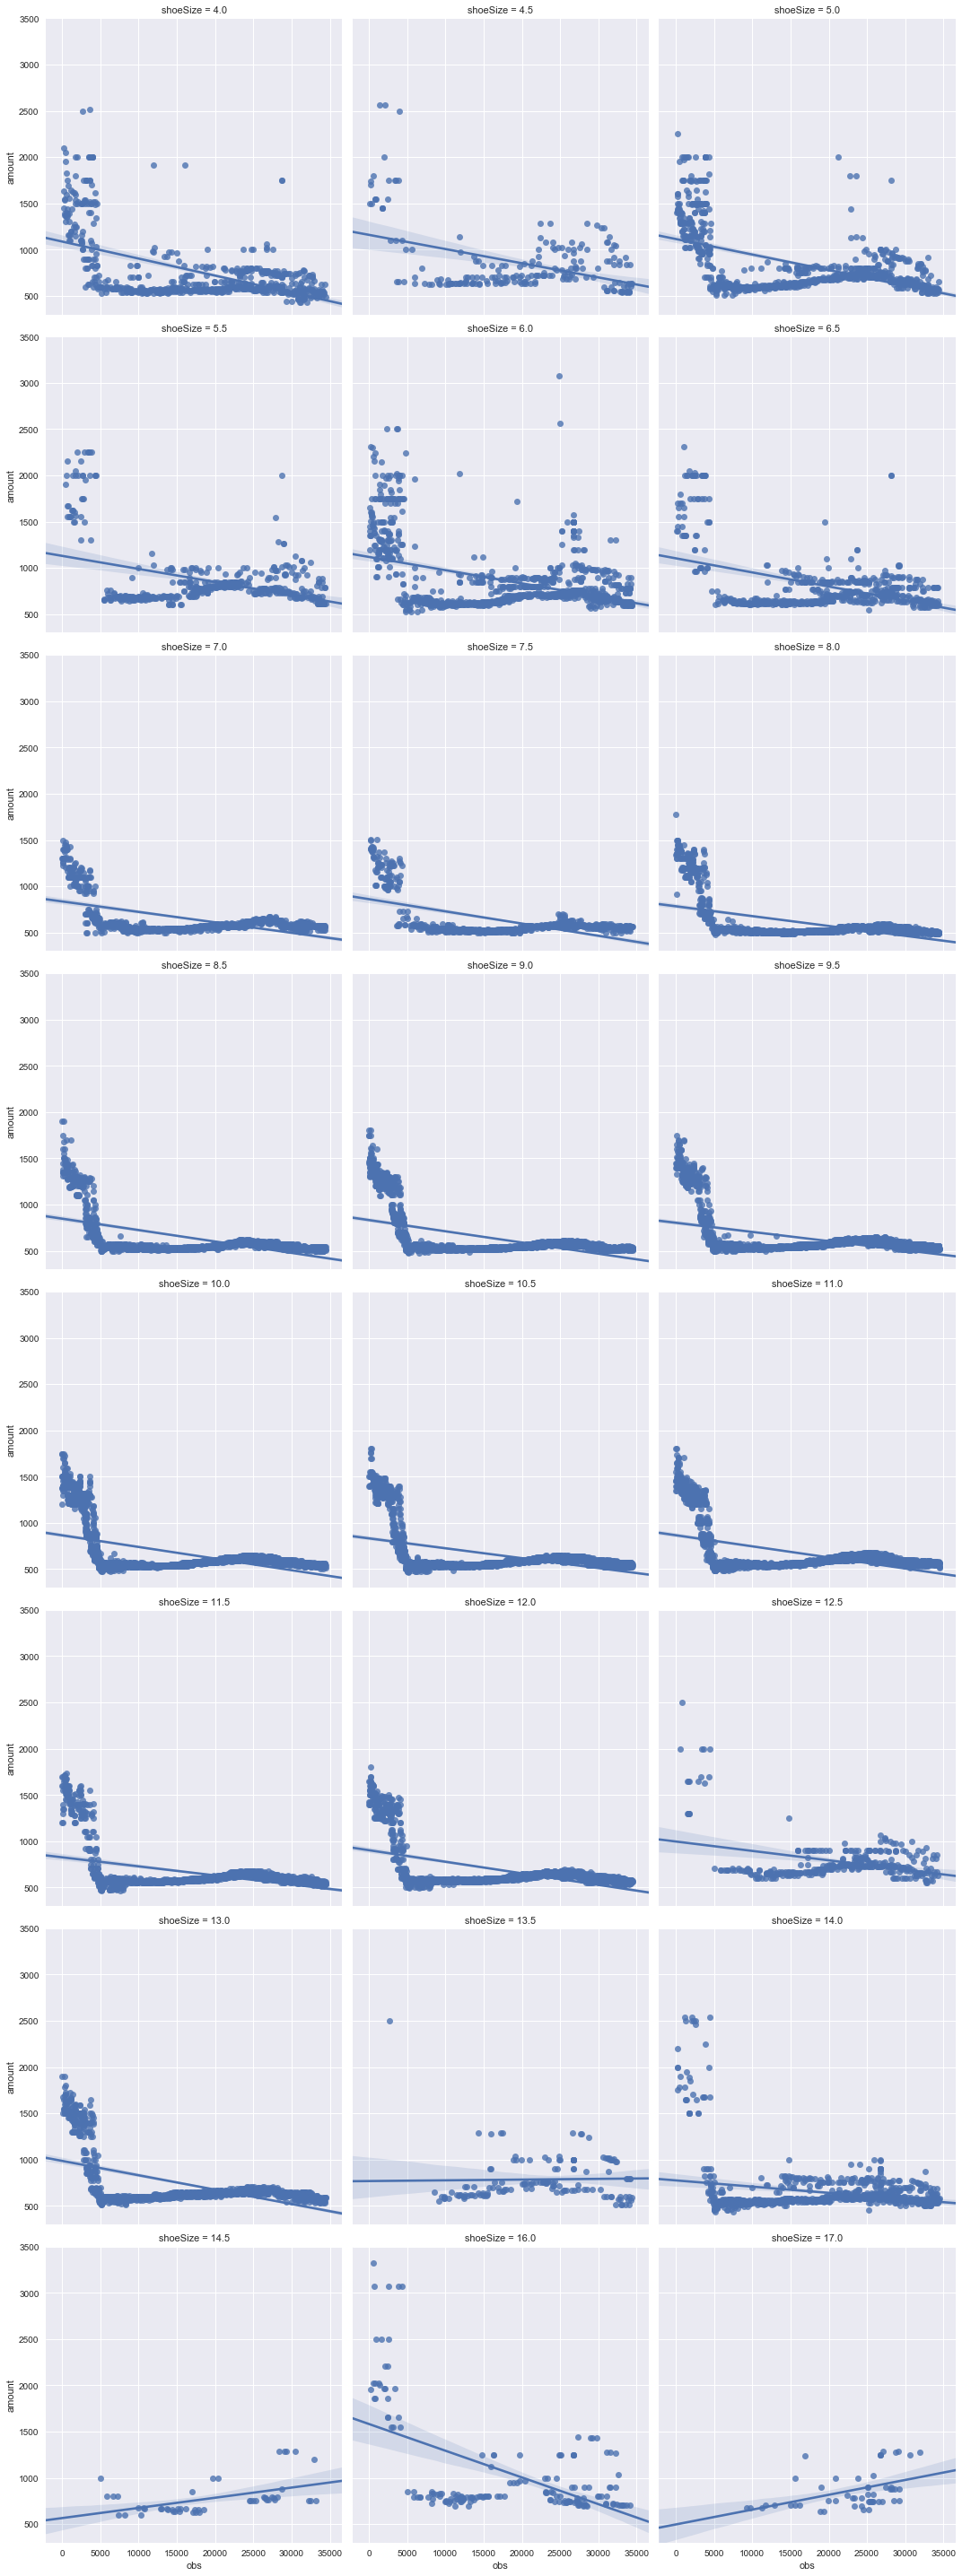

In [6]:
df2 = df[['createdAt', 'amount']]
# plt.rcParams['figure.figsize']=(20,10)
lm = sns.lmplot(data=df, x='obs', y='amount', col='shoeSize', col_wrap=3)
axes = lm.axes
axes[0,].set_ylim(300,3500)

# plt.plot(df['createdAt'], df['amount'])
# plt.figure(figsize=(5,9), dpi=100)
# plt.show()

It seems that there's a distinct pattern that holds through most of the shoe sizes, with the exception of some of the sizes sold in lower volumes. Let's take a look at the distribution of the number of shoes sold by shoe size.

TypeError: slice indices must be integers or None or have an __index__ method

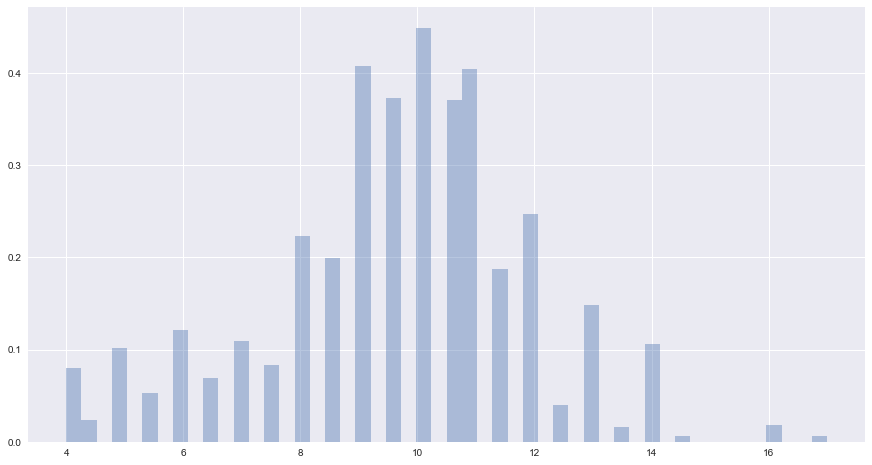

In [7]:
sns.set_context(context='notebook', rc={'figure.figsize':(15,8)})
sns.distplot(df['shoeSize'])

It seems to be pretty close to normally dsitributed, but there seems to be a noticeable dip in the amount of 'half sizes' (ie 12.5, 13.5). Perhaps they just didn't make as many half sizes. Does this lower volume of half sizes result in a price premium? I'll use seaborn's [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) to check this visually.

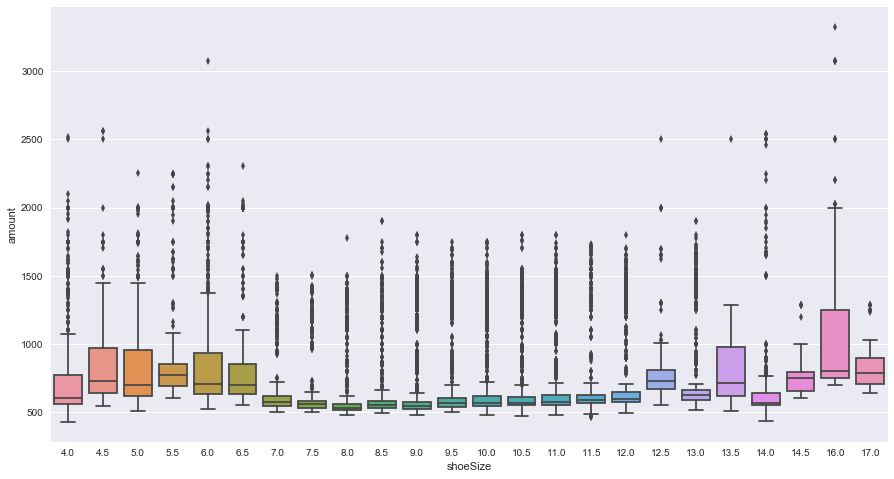

In [8]:
sns.boxplot(data=df, x='shoeSize', y='amount')

The proposed relationship with the half sizes and whole sizes seems very weak with the smaller sizes, but gets more pronounced in the 12-14 range.

Let's take a look at all transactions.

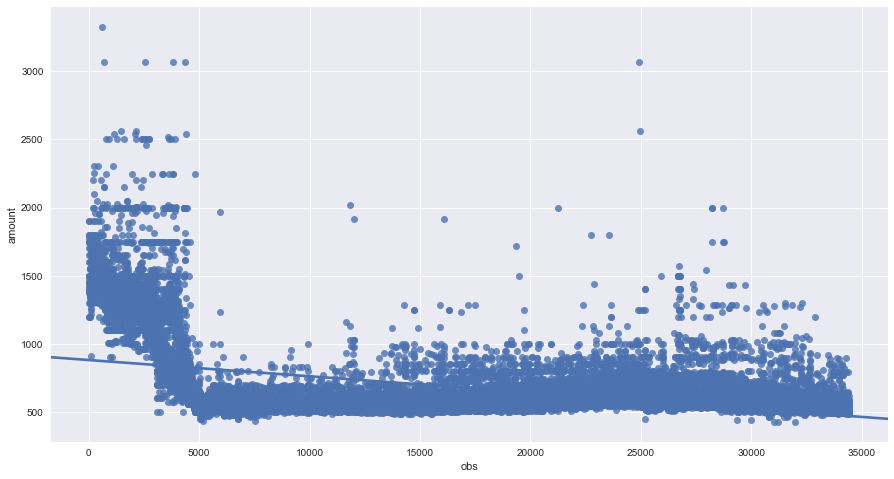

In [9]:
g = sns.regplot(x="obs", y="amount", data = df)



In [11]:
df[["amount"]].describe()

,amount
count,34453.00000
mean,675.98720
std,263.62753
min,427.00000
25%,545.00000
50%,577.00000
75%,640.00000
max,3327.00000


In [12]:
import time
def dformat(createdat):
    return createdat.strftime('%m/%d/%Y')
df['Date'] = df.apply(lambda row: dformat(row['createdAt']), axis=1)
df['Date'].head()

34452    02/18/2017
34451    02/20/2017
34450    02/23/2017
34449    02/20/2017
34448    02/24/2017
Name: Date, dtype: object

In [13]:
len(df['Date'].unique())

359

In [62]:
# datedf = df.groupby('Date').obs.nunique()
# datedf = df['Date'].unique
# datedf = pd.DataFrame
dates = df['Date'].unique()
obs = list(df.groupby('Date').obs.nunique().values)
# newdict = dict(zip(dates,obs))
newdict = {}
newdict['Dates'] = dates
newdict['obs'] = obs
datedf = pd.DataFrame(newdict)

datedf.head(30)

# l = df['Date'].unique()
# l
# datedf['Date'] = l

,Dates,obs
0,02/18/2017,4
1,02/20/2017,76
2,02/23/2017,61
3,02/24/2017,56
4,02/21/2017,100
5,02/22/2017,40
6,02/25/2017,7
7,02/26/2017,71
8,03/06/2017,73
9,03/07/2017,49


In [59]:
# datedf['Dates'].loc[datedf['obs'] == datedf['obs'].max()]
# datedf.head()
datedf['obs'].iloc[175]

711

In [65]:
datedf['obs'].loc[datedf['Dates'] == '07/26/2017']

150    108
Name: obs, dtype: int64

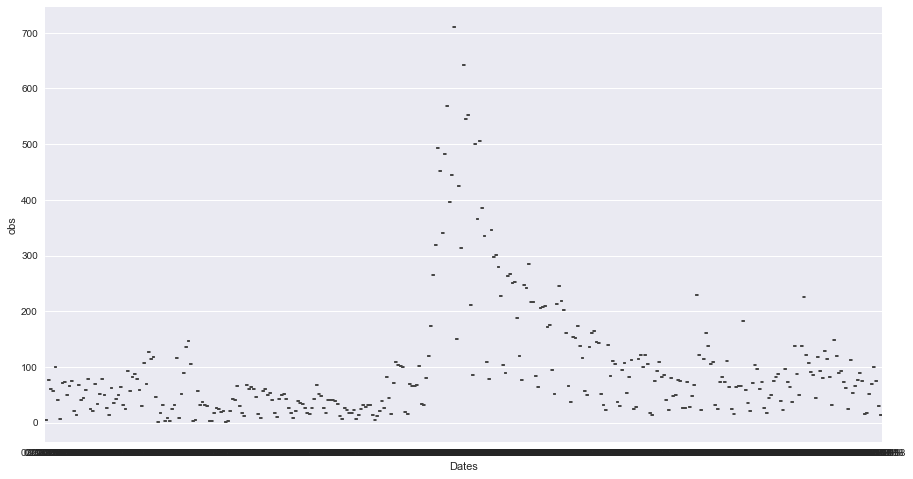

In [42]:
sns.boxplot(data=datedf, x="Dates", y="obs")

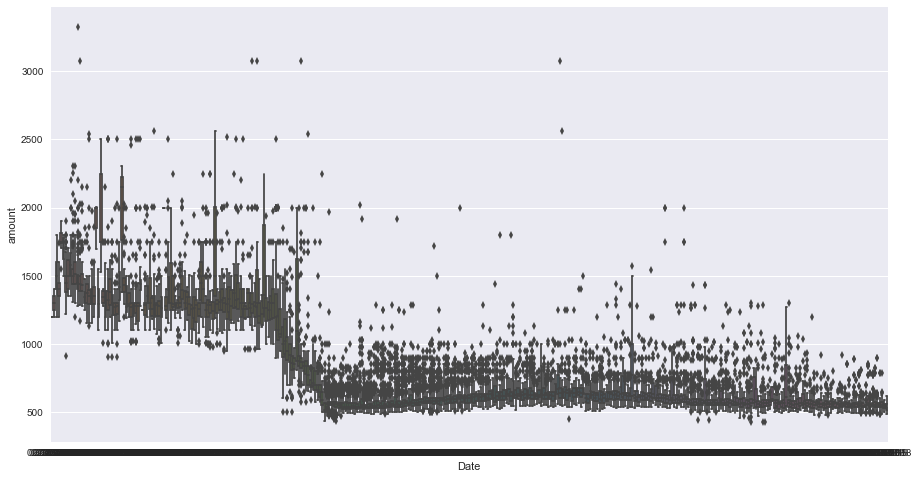

In [46]:
sns.boxplot(data=df, x="Date", y="amount")